**Pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

**Note:** before running the cells, make sure the dataset is uplaoded in the *Files* section of your notebook. <br>
Open the *Files* section on the left menu bar and simply drag and drop your file in there.

Here, we chose the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census. It is not exactly recent (you could still afford a nice house in the Bay Area at the time), but it has many qualities for learning, so we will pretend it is recent data. We also added a categorical attribute and removed a few features for teaching purposes.

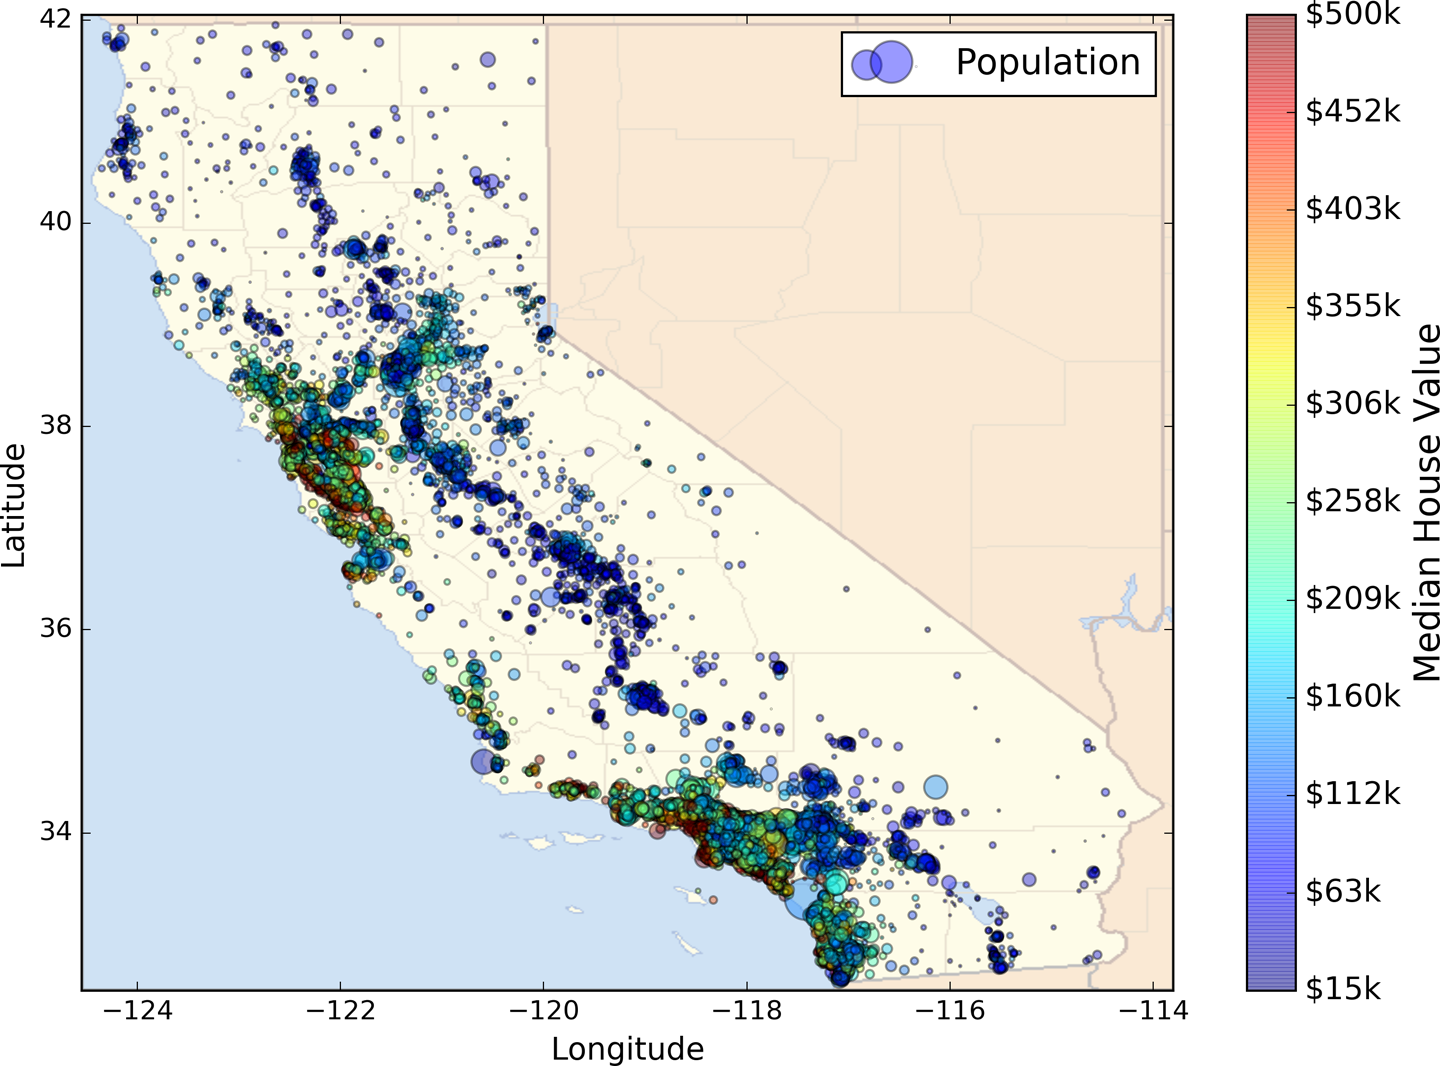

In [ ]:
# import the dataset using pandas
import pandas as pd
housing = pd.read_csv('housing.csv')

In [ ]:
type(housing)

pandas.core.frame.DataFrame

In [ ]:
# showing the head of the table
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. There are 10 attributes: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, and ocean_proximity.

The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


When you looked at the top five rows, you probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the value_counts() method.

In [ ]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
# stat info of the features
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). The std row shows the standard deviation, which measures how dispersed the values are.

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute

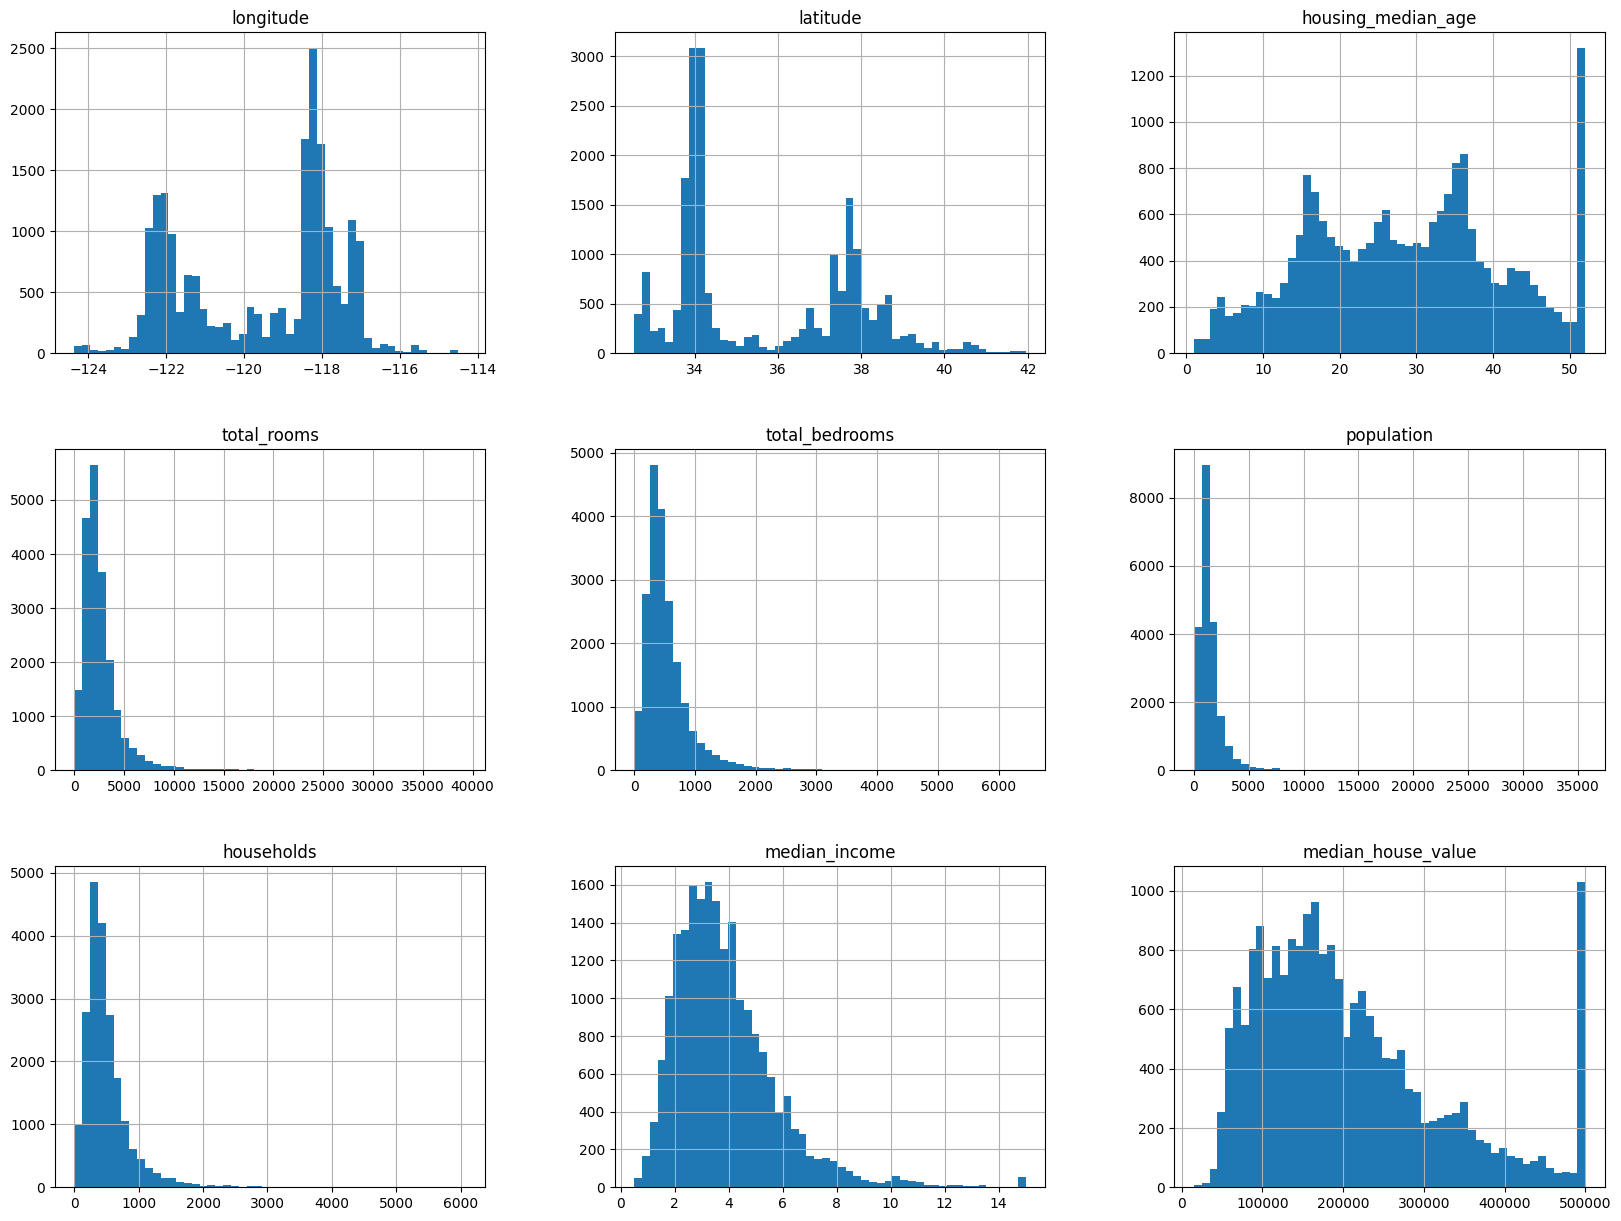

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Notice a few things in these histograms:
1. First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000). Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the data was computed.

2. The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have mainly two options:



  *   Collect proper labels for the districts whose labels were capped.
  *   Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).





3. These attributes have very different scales. We will discuss this later in this chapter when we explore feature scaling.

4. Finally, many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

**scikit-learn** <br>
scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

**Create a Test Set** <br>
It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.

Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset, and set them aside:

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)

In [ ]:
train_set.shape

(16512, 10)

In [ ]:
test_set.shape

(4128, 10)

**Discover and Visualize the Data to Gain Insights** <br>
So far you have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go a little bit more in depth.

First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small so you can just work directly on the full set. Let’s create a copy so you can play with it without harming the training set:

In [ ]:
housing = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

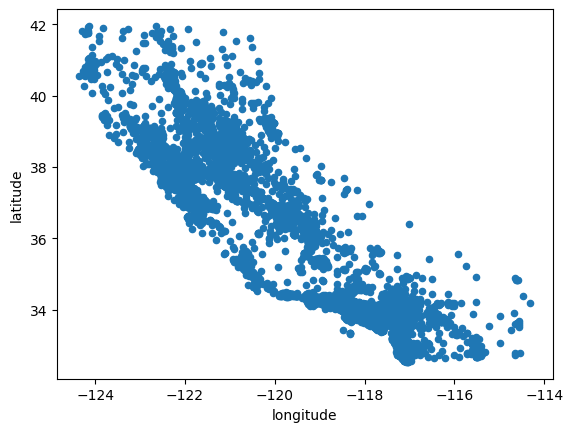

In [ ]:
# visualizing geographical data
housing.plot(kind="scatter", x="longitude", y="latitude")

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points.

<Axes: xlabel='longitude', ylabel='latitude'>

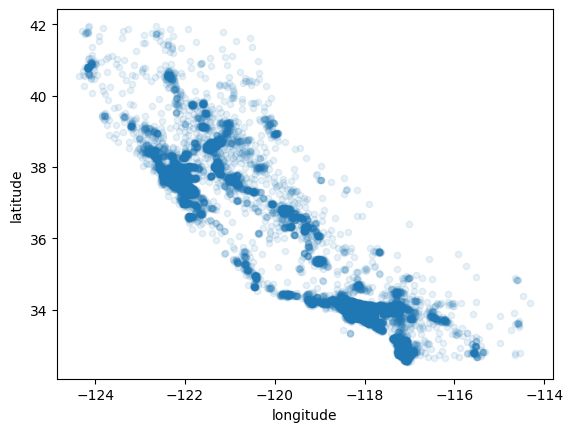

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Now that’s much better: you can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

Now let’s look at the housing prices. The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):

**Look for Correlations** <br>
Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method.

In [ ]:
housing = housing.drop(columns=['ocean_proximity']) # drop the object variable as it will not be used for correlation calc

In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925233,-0.107019,0.043517,0.070320,0.098568,0.054739,-0.015276,-0.045095
latitude,-0.925233,1.000000,0.008067,-0.033252,-0.066099,-0.106377,-0.069802,-0.078463,-0.145205
housing_median_age,-0.107019,0.008067,1.000000,-0.361498,-0.321028,-0.292295,-0.302959,-0.116604,0.108758
total_rooms,0.043517,-0.033252,-0.361498,1.000000,0.929135,0.850180,0.915773,0.195119,0.132733
total_bedrooms,0.070320,-0.066099,-0.321028,0.929135,1.000000,0.870527,0.978172,-0.013785,0.047020
population,0.098568,-0.106377,-0.292295,0.850180,0.870527,1.000000,0.902024,-0.001442,-0.027357
households,0.054739,-0.069802,-0.302959,0.915773,0.978172,0.902024,1.000000,0.008025,0.063866
median_income,-0.015276,-0.078463,-0.116604,0.195119,-0.013785,-0.001442,0.008025,1.000000,0.687393
median_house_value,-0.045095,-0.145205,0.108758,0.132733,0.047020,-0.027357,0.063866,0.687393,1.000000


Now you can look at how much each attribute correlates with the median house value.

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687393
total_rooms,0.132733
housing_median_age,0.108758
households,0.063866
total_bedrooms,0.047020
population,-0.027357
longitude,-0.045095
latitude,-0.145205


The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to 0 mean that there is no linear correlation.

Another way to check for correlation between attributes is to use the Pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get 112 = 121 plots, which would not fit on a page—so you decide to focus on a few promising attributes that seem most correlated with the median housing value.

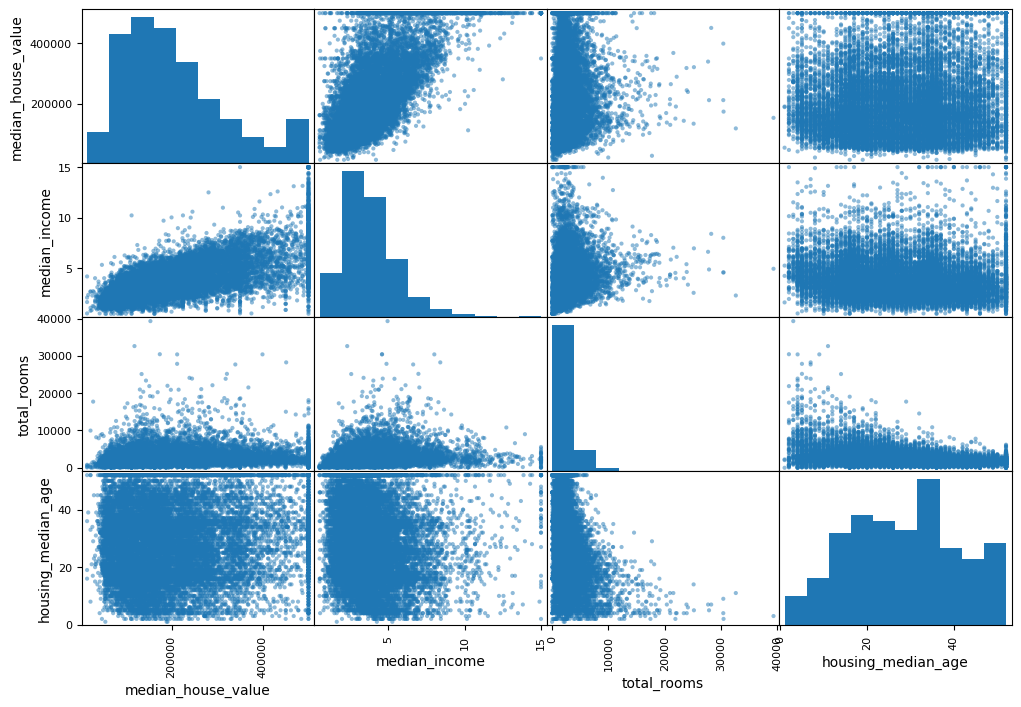

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

The main diagonal would be full of straight lines if Pandas plotted each variable against itself, which would not be very useful. So instead, the Pandas displays a histogram of each attribute (other options are available; see the Pandas documentation for more details).

Looking at the correlation scatterplots, it seems like the most promising attribute to predict the median house value is the median income, so you zoom in on their scatterplot.

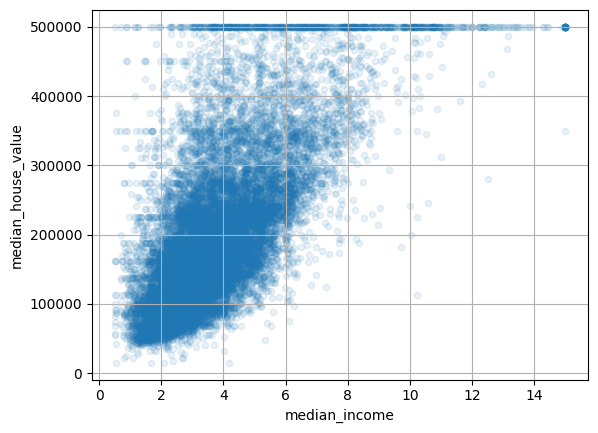

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

This plot reveals a few things. First, the correlation is indeed quite strong; you can clearly see the upward trend, and the points are not too dispersed. Second, the price cap you noticed earlier is clearly visible as a horizontal line at $500,000. <br>

But the plot also reveals other less obvious straight lines: a horizontal line around $450,000, <br>

Another around $350,000, <br>

Perhaps one around $280,000, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

One last thing you may want to do before preparing the data for machine learning algorithms is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. You create these new attributes as follows:

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["poplution_per_household"] = housing["population"] / housing["households"]

And then you look at the correlation matrix again.

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687393
rooms_per_household,0.147215
total_rooms,0.132733
housing_median_age,0.108758
households,0.063866
total_bedrooms,0.047020
population,-0.027357
poplution_per_household,-0.032384
longitude,-0.045095


The new bedrooms_ratio attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

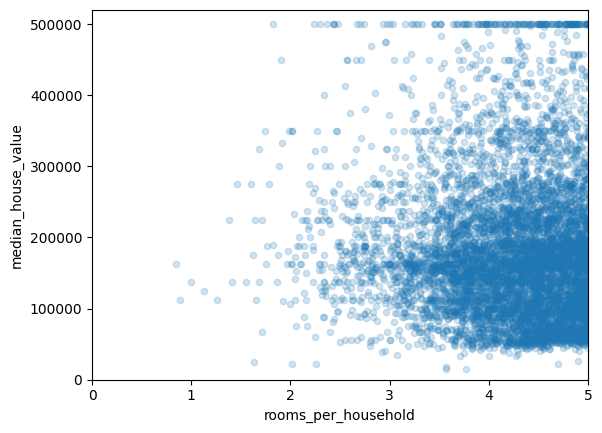

In [ ]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

It’s time to prepare the data for your machine learning algorithms. Instead of doing this manually, you should write functions for this purpose, for several good reasons:

1. This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).

2. You will gradually build a library of transformation functions that you can reuse in future projects.

3. You can use these functions in your live system to transform the new data before feeding it to your algorithms.

4. This will make it possible for you to easily try various transformations and see which combination of transformations works best.

You should also separate the predictors and the labels, since you don’t necessarily want to apply the same transformations to the predictors and the target values (note that drop() creates a copy of the data and does not affect train_set):

In [ ]:
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy()

**Clean the Data**

Most machine learning algorithms cannot work with missing features, so you’ll need to take care of these. For example, you noticed earlier that the total_bedrooms attribute has some missing values. You have three options to fix this:

1. Get rid of the corresponding districts.

2. Get rid of the whole attribute.

3. Set the missing values to some value (zero, the mean, the median, etc.). This is called imputation.

In [ ]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6814,-118.07,34.10,32.0,4275.0,NaN,2812.0,1012.0,3.3512,<1H OCEAN
4738,-118.38,34.05,49.0,702.0,NaN,458.0,187.0,4.8958,<1H OCEAN
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,NEAR BAY
19833,-119.38,36.53,38.0,1281.0,NaN,1423.0,293.0,1.9602,INLAND
4852,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,<1H OCEAN


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12346 to 17673
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
# option 1
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)
housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
# option 2
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)
housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
6814,-118.07,34.10,32.0,4275.0,2812.0,1012.0,3.3512,<1H OCEAN
4738,-118.38,34.05,49.0,702.0,458.0,187.0,4.8958,<1H OCEAN
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,NEAR BAY
19833,-119.38,36.53,38.0,1281.0,1423.0,293.0,1.9602,INLAND
4852,-118.31,34.03,47.0,1315.0,785.0,245.0,1.2300,<1H OCEAN


In [ ]:
# option 3
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)
housing_option3.loc[null_rows_idx].head()

<ipython-input-26-d9ab88fc5da4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6814,-118.07,34.10,32.0,4275.0,435.0,2812.0,1012.0,3.3512,<1H OCEAN
4738,-118.38,34.05,49.0,702.0,435.0,458.0,187.0,4.8958,<1H OCEAN
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,NEAR BAY
19833,-119.38,36.53,38.0,1281.0,435.0,1423.0,293.0,1.9602,INLAND
4852,-118.31,34.03,47.0,1315.0,435.0,785.0,245.0,1.2300,<1H OCEAN


You decide to go for option 3 since it is the least destructive, but instead of the preceding code, you will use a handy Scikit-Learn class: SimpleImputer. The benefit is that it will store the median value of each feature: this will make it possible to impute missing values not only on the training set, but also on the validation set, the test set, and any new data fed to the model. To use it, first you need to create a SimpleImputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, you then need to create a copy of the data with only the numerical attributes (this will exclude the text attribute ocean_proximity):

In [ ]:
import numpy as np
housing_num = housing.select_dtypes(include=[np.number])

# alternative
# housing_num = housing.drop('ocean_proximity', axis=1)

Now you can fit the imputer instance to the training data using the fit() method:

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. Only the total_bedrooms attribute had missing values, but you cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [ ]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2125.     ,  435.     ,
       1165.5    ,  409.     ,    3.53245])

Check that this is the same as manually computing the median of each attribute:

In [ ]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2125.     ,  435.     ,
       1165.5    ,  409.     ,    3.53245])

Now you can use this “trained” imputer to transform the training set by replacing missing values with the learned medians:

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matrices) even when they are fed Pandas DataFrames as input.⁠11 So, the output of imputer.transform(housing_num) is a NumPy array: X has neither column names nor index. Luckily, it’s not too hard to wrap X in a DataFrame and recover the column names and index from housing_num:

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6814,-118.07,34.10,32.0,4275.0,435.0,2812.0,1012.0,3.3512
4738,-118.38,34.05,49.0,702.0,435.0,458.0,187.0,4.8958
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750
19833,-119.38,36.53,38.0,1281.0,435.0,1423.0,293.0,1.9602
4852,-118.31,34.03,47.0,1315.0,435.0,785.0,245.0,1.2300


**Handling Text and Categorical Attributes** <br>
So far we have only dealt with numerical attributes, but your data may also contain text attributes. In this dataset, there is just one: the ocean_proximity attribute. Let’s look at its value for the first few instances:

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
12346,INLAND
19326,<1H OCEAN
16824,NEAR OCEAN
6869,<1H OCEAN
16677,<1H OCEAN
1811,NEAR BAY
15642,NEAR BAY
704,NEAR BAY


It’s not arbitrary text: there are a limited number of possible values, each of which represents a category. So this attribute is a categorical attribute. Most machine learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded[:8]

array([[1.],
       [0.],
       [4.],
       [0.],
       [0.],
       [3.],
       [3.],
       [3.]])

You can get the list of categories using the categories_ instance variable. It is a list containing a 1D array of categories for each categorical attribute (in this case, a list containing a single array since there is just one categorical attribute):

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the category is "INLAND" (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes. Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

By default, the output of a OneHotEncoder is a SciPy sparse matrix, instead of a NumPy array:

In [ ]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

A sparse matrix is a very efficient representation for matrices that contain mostly zeros. Indeed, internally it only stores the nonzero values and their positions. When a categorical attribute has hundreds or thousands of categories, one-hot encoding it results in a very large matrix full of 0s except for a single 1 per row. In this case, a sparse matrix is exactly what you need: it will save plenty of memory and speed up computations. You can use a sparse matrix mostly like a normal 2D array,⁠ but if you want to convert it to a (dense) NumPy array, just call the toarray() method:

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

Alternatively, you can set sparse=False when creating the OneHotEncoder:

In [ ]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Feature Scaling and Transformation** <br>
One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, machine learning algorithms don’t perform well when the input numerical attributes have very different scales. **This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Without any scaling, most models will be biased toward ignoring the median income and focusing more on the number of rooms.**

There are two common ways to get all attributes to have the same scale: **min-max scaling and standardization.**

Min-max scaling (many people call this normalization) is the simplest: for each attribute, the values are shifted and rescaled so that they end up ranging from 0 to 1. This is performed by subtracting the min value and dividing by the difference between the min and the max. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

Standardization is different: first it subtracts the mean value (so standardized values have a zero mean), then it divides the result by the standard deviation (so standardized values have a standard deviation equal to 1). Unlike min-max scaling, standardization does not restrict values to a specific range. However, standardization is much less affected by outliers. For example, suppose a district has a median income equal to 100 (by mistake), instead of the usual 0–15. Min-max scaling to the 0–1 range would map this outlier down to 1 and it would crush all the other values down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization:

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

**Transformation Pipeline** <br>
As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, **Scikit-Learn provides the Pipeline class to help with such sequences of transformations**. Here is a small pipeline for numerical attributes, which will first impute then scale the input features:

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

The Pipeline constructor takes a list of name/estimator pairs (2-tuples) defining a sequence of steps. The names can be anything you like, as long as they are unique and don’t contain double underscores (__). They will be useful later, when we discuss hyperparameter tuning. The estimators must all be transformers (i.e., they must have a fit_transform() method), except for the last one, which can be anything: a transformer, a predictor, or any other type of estimator.

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2) #rounded to two decimal places

array([[ 1.52, -0.85, -0.6 ,  3.52,  4.27,  1.93,  3.26, -0.71],
       [-1.68,  1.34,  1.38, -0.16, -0.11, -0.54, -0.35, -0.65]])

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer capable of handling all columns, applying the appropriate transformations to each column. For this, you can use a ColumnTransformer. For example, the following ColumnTransformer will apply num_pipeline (the one we just defined) to the numerical attributes and cat_pipeline to the categorical attribute:

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("oneHot", OneHotEncoder()),
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

First we import the ColumnTransformer class, then we define the list of numerical and categorical column names and construct a simple pipeline for categorical attributes. Lastly, we construct a ColumnTransformer. Its constructor requires a list of triplets (3-tuples), each containing a name (which must be unique and not contain double underscores), a transformer, and a list of names (or indices) of columns that the transformer should be applied to.

Now we’re ready to apply this ColumnTransformer to the housing data:

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
#dimensions of the new trandformed data ready for modeling
housing_prepared.shape

(16512, 13)

In [ ]:
preprocessing.get_feature_names_out()

array(['num__longitude', 'num__latitude', 'num__housing_median_age',
       'num__total_rooms', 'num__total_bedrooms', 'num__population',
       'num__households', 'num__median_income',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN'], dtype=object)

**Log Transformation for Heavy-Tailed Data**

There are other ways to transform a variable (integer) depending on the application, its characteristics, etc. One very useful transformation method is using the log transformation of the data:


**When to Use a Log Transformation:**
* Skewed Data: If the distribution of a numerical feature is highly skewed (especially with long tails to the right), log transformation can help normalize the distribution.
* Reducing the Impact of Outliers: Log transformation can reduce the effect of large outliers by compressing the range of values.
* Nonlinear Relationships: If a feature has a nonlinear relationship with the target variable, applying a log transformation might help linearize it, making it easier to model with linear techniques.
* In short, use log transformation when your data is heavily skewed, contains large outliers, or you suspect a multiplicative relationship in the data.

For transformations that don’t require any training, you can simply write a function that takes a NumPy array as input and returns the transformed array. For example, in the housing data, the population feature has a heavy-tailed distribution. If the values are positive and the tail extends to the right, you can apply a log transformation to replace it with its logarithm.








In [111]:
#creating log-transformer for the population variable
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

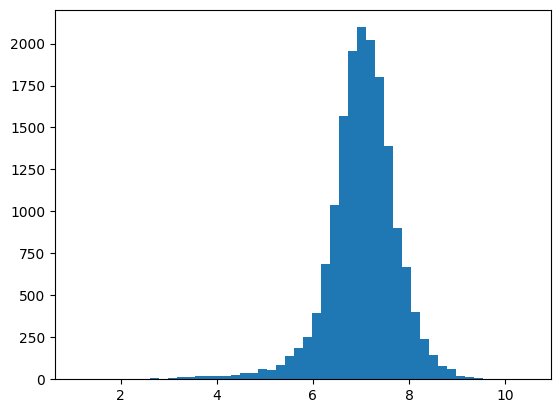

In [112]:
import matplotlib.pyplot as plt
plt.hist(log_pop, bins=50)
plt.show()

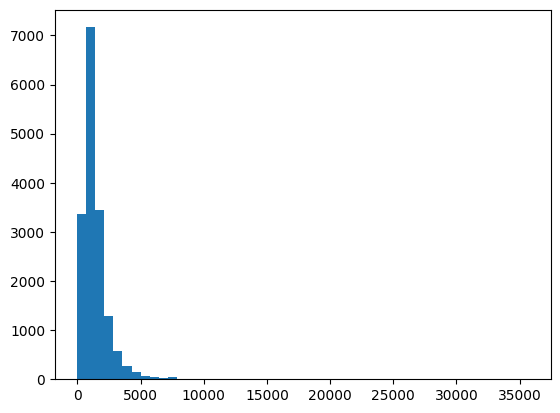

In [113]:
import matplotlib.pyplot as plt
plt.hist(housing['population'], bins=50)
plt.show()

**Gaussian RBF Transformation for Multimodal Data**

Another feature scaling method is when deang with multimodal distributions. One way to transform multimodal distributions is by adding a feature that captures the similarity between the housing median age and each key mode in the data. This similarity is typically measured using a radial basis function (RBF), which calculates a value based only on the distance between an input and a fixed point. The most common RBF is the Gaussian RBF, which decreases exponentially as the input moves further from the fixed point.

For example, to measure how close a housing age x is to 35 years, you can use the Gaussian RBF formula: **exp(-γ(x - 35)^2)**, where the hyperparameter γ (gamma) controls how quickly the similarity declines as x moves away from 35.

Using Scikit-Learn’s rbf_kernel() function, you can create a new feature that measures the similarity between the housing median age and 35. The plot below demonstrates how this feature behaves as a function of the housing median age. The chart also shows what happens when you use a smaller gamma value, making the similarity curve broader and flatter. The feature peaks at 35, near the spike in the housing median age distribution. If homes around this age correlate with lower prices, this feature could be valuable in your model.

In [114]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

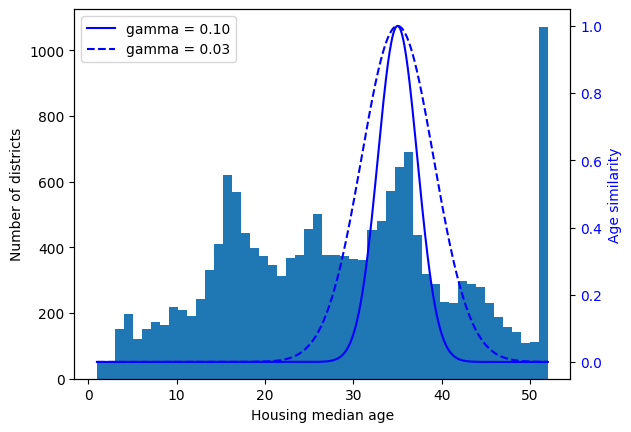

In [115]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")

plt.show()

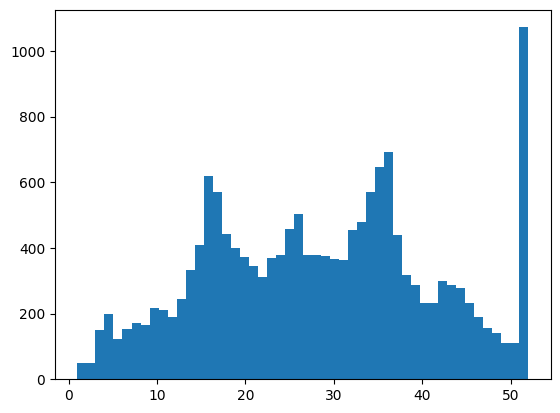

In [116]:
import matplotlib.pyplot as plt
plt.hist(housing['housing_median_age'], bins=50)
plt.show()